<a href="https://colab.research.google.com/github/blackxhrt2102/Energy-prediction/blob/main/Applicance_Energy_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

: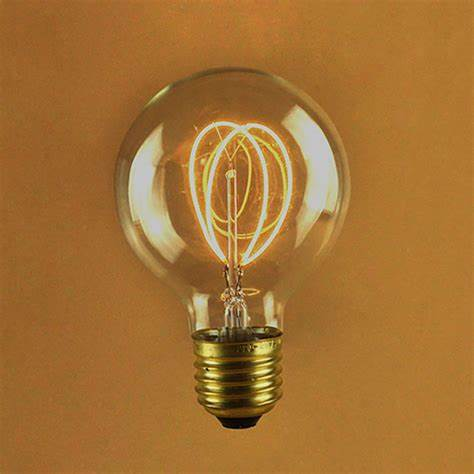

#                      APPLICANCE ENERGY PREDICTION
------------------------------------------------------------------------------
**About the dataset:-**
* The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions
were monitored with a ZigBee wireless sensor network.
* Each wireless node transmitted the
temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for
10 minutes periods. 
* The energy data was logged every 10 minutes with m-bus energy meters.
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded
from a public data set from Reliable Prognosis (rp5.ru) and merged together with the
experimental data sets using the date and time column. 
* Two random variables have been
included in the data set for testing the regression models and to filter out non-predictive attributes
(parameters).

--------------------------------------------------------------------------------

# Different types of column in dataset:-

* **Date**:-> Time year-month-day hour:minute:second
* **Appliances**-Energy use in Wh (Dependent variable)
* **lights**- energy use of light fixtures in the house in Wh (Drop this column)
* **T1**-Temperature in kitchen area
* **RH1**- Humidity in kitchen are
* **T2**-Temperature in living room area
* **RH2**-Humidity in living room area
* **T3** Temperature in laundry room area
* **RH3**-Humidity in laundry room area
* **T4**- Temperature in office room
* **RH4**- Humidity in office room
* **T5**-Temperature in bathroom
* **RH5**, Humidity in bathroom
* **T6**-Temperature outside the building (north side)
* **RH6**-Humidity outside the building
* **T7**-Temperature in ironing room
* **RH7**-Humidity in ironing room
* **T8**-Temperature in teenager room 2
* **RH8**- Humidity in teenager room 2
* **T9**, Temperature in parents room
* **RH9**, Humidity in parents room, 
* **To**, Temperature outside (from Chievres weather station),
Celsius Pressure (from Chievres weather station), in mm Hg 
* **RHout**-> Humidity outside (from Chievres weather station)
* **Wind speed**-> (From Chievres weather station), in m/s
* **Visibility**-> (From Chievres weather station), in km
* **Tdewpoint**-> From Chievres weather station(Â°C)
* **rv1**-> Random variable 1 (nondimensional)
* **rv2**-> Random variable 2 (nondimensional)



--------------------------------------------------------------------------------


**Aim of the project**
* **Our aim of the project is to predict the usage of energy in appliances on basis of different variable like temperature,windspeed etc.**

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# DATA ANALYSIS AND PREDICTION:

* **Importing the modules:-**

In [15]:
# Basic modules for data science:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#--------------------------------------------------------------

# Modules for Data Cleaning:-
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#--------------------------------------------------------------

# Modules for Feature Selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
#--------------------------------------------------------------

# Algorithm
from sklearn.linear_model import LinearRegression,RidgeCV,Ridge,LassoCV,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from lightgbm import LGBMRegressor

#-----------------------------------------------------------------------------------
# Accuracy metrics:-
from sklearn.metrics import r2_score,mean_squared_error


%matplotlib inline
sns.set_style('darkgrid')

* **Loading the dataset:-**

In [16]:
data=pd.read_csv('/content/drive/MyDrive/data_application_energy.csv')

# 1. Data Understanding

 1.1     **First 4 rows of dataset:-**





In [17]:
data.head(4)  

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389


1.2. **Last 4 rows of dataset:-**

In [18]:
data.tail(4)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19731,2016-05-27 17:30:00,90,0,25.5,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


1.3. **Shape of the datset:-**

In [19]:
print('Shape of the dataset:-',end='')
data.shape

Shape of the dataset:-

(19735, 29)

1.4. **Data Types of columns and non-missing values:-**

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

* Most of the columns are of int and float.
* Only one columns 'date' is of object which can be converted to timestamp.

1.5. **Statistical Description of dataset:-**

In [21]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


# 2. Data Preprocessing

2.1. **Changing data type of date column to Time Stamp object:-**

In [22]:
data['date']=pd.to_datetime(data['date'])  

2.2. **Extracting week name and month name from dataset:-**

In [23]:
data['weekday']=data['date'].dt.day_name()
data['month']=data['date'].dt.month_name()

2.3. **Renaming columns names :-**

In [24]:
data=data.rename(columns={'T1':'Temp_kitchen','RH_1':'Humid_kitchen','T2':'Temp_living','RH_2':'Humid_living','T3':'Temp_laundry','RH_3':'Humid_laundry','T4':'Temp_office','RH_4':'Humid_office','T5':'Temp_bathroom','RH_5':'Humid_bathroom','T6':'Temp_north','RH_6':'Humid_north','T7':'Temp_ironing','RH_7':'Humid_ironing','T8':'Temp_teenage','RH_8':'Humid_teenage','T9':'Temp_parent','RH_9':'Humid_parent','T_out':'Temp_outside','Press_mm_hg':'Press_mm_hg','RH_out':'Humid_outside'})
print('Name of the columns:-',data.columns)

Name of the columns:- Index(['date', 'Appliances', 'lights', 'Temp_kitchen', 'Humid_kitchen',
       'Temp_living', 'Humid_living', 'Temp_laundry', 'Humid_laundry',
       'Temp_office', 'Humid_office', 'Temp_bathroom', 'Humid_bathroom',
       'Temp_north', 'Humid_north', 'Temp_ironing', 'Humid_ironing',
       'Temp_teenage', 'Humid_teenage', 'Temp_parent', 'Humid_parent',
       'Temp_outside', 'Press_mm_hg', 'Humid_outside', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'weekday', 'month'],
      dtype='object')


2.4. **Dropping unecessary columns:-**


In [25]:
data=data.drop(['date','lights'],axis=1)


**2.5. Dropping duplicate values:-**

In [26]:
data=data.drop_duplicates()

2.6. **Number of missing values:-**

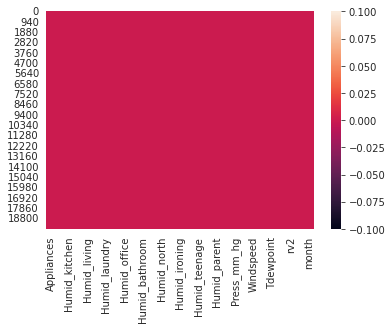

In [27]:
sns.heatmap(data.isnull())

* **Conclusion-There is no missing value in dataset.**

# 3.Data Visualization

3.1. **Histogram of all column values:-**

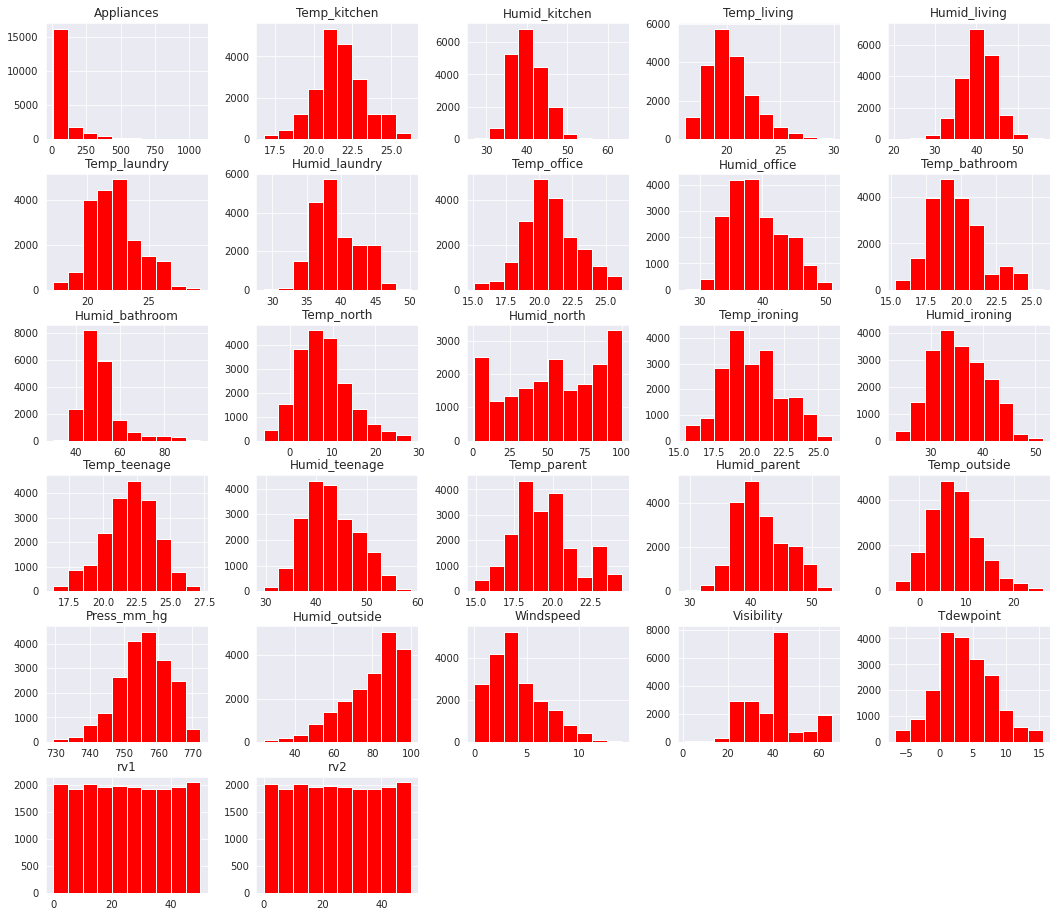

In [28]:
data.hist(figsize=(18,16),color='red')
plt.show()

3.2 **Boxplot of different columns:-**

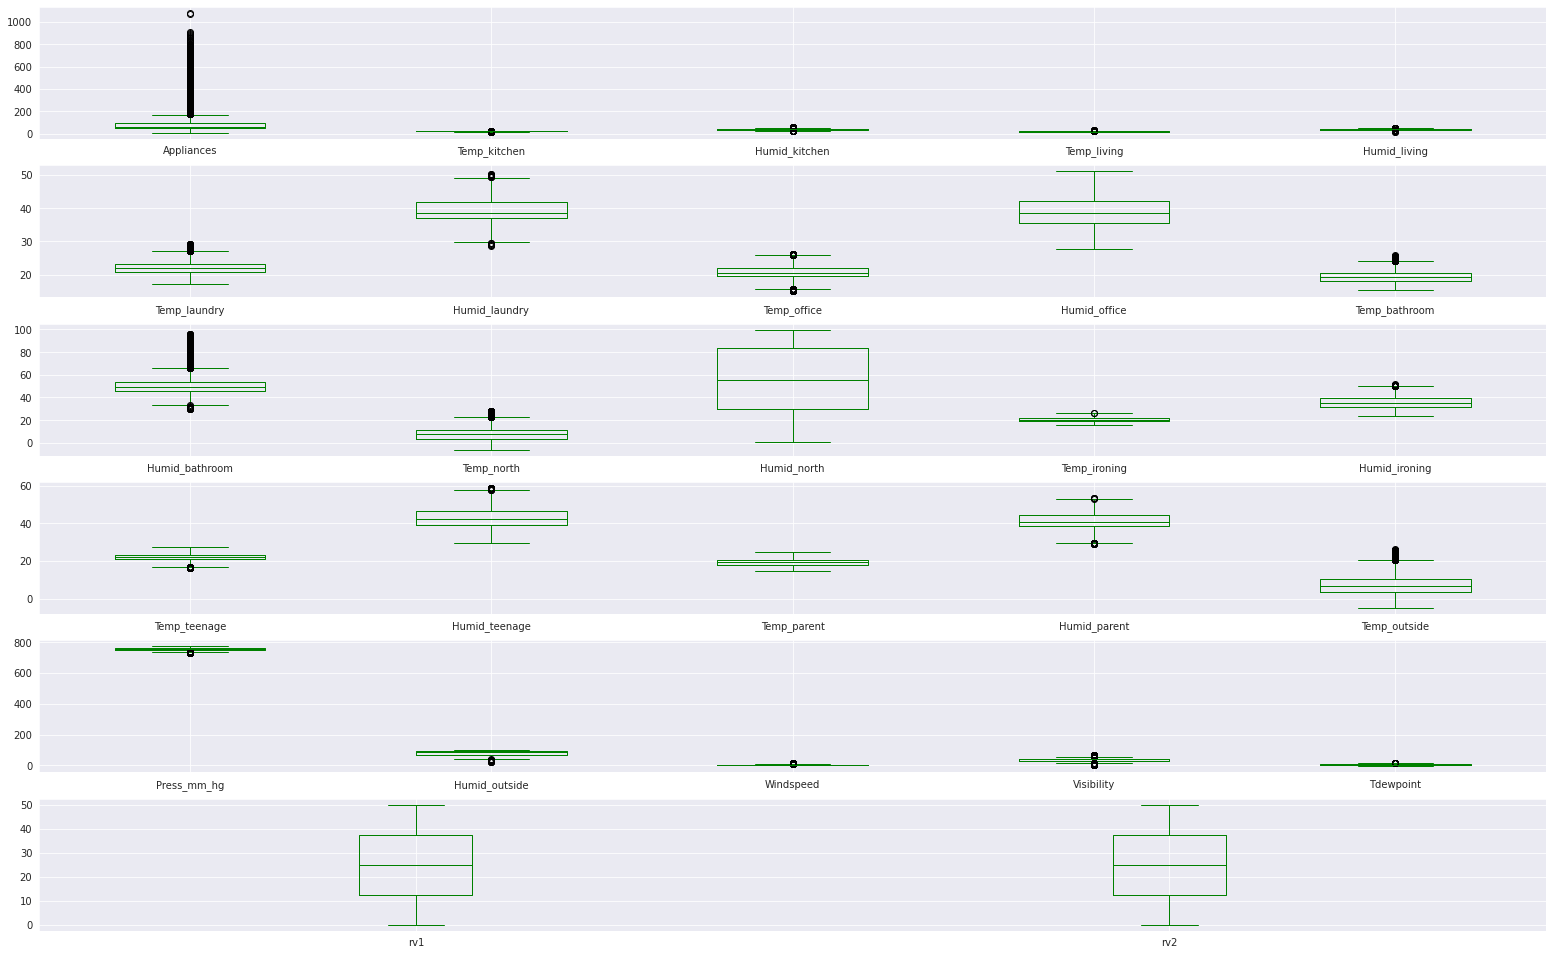

In [29]:
a=[]
data2=data.drop(['month','weekday'],axis=1)
for i in range(0,30,5):
  a.append(list(data2.iloc[:,i:i+5].columns))
#----------------------------------------------------------------------------------------------
fig,ax=plt.subplots(6,1,figsize=(27,17))
for i in range(len(a)):
  data2.boxplot(column=a[i],ax=ax[i],color='green')

3.3. **Violin plot between Appliances and its usage in different month:-**

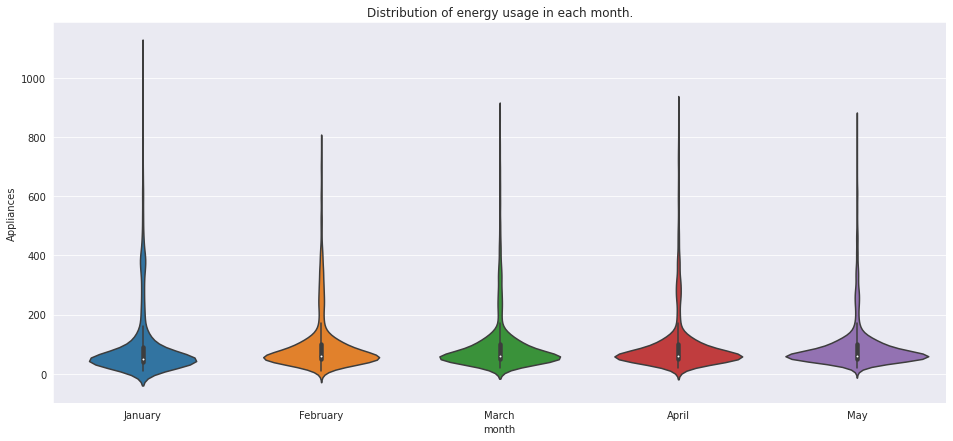

In [30]:
plt.figure(figsize=(16,7))

sns.violinplot(y='Appliances',data=data,x='month')
plt.title('Distribution of energy usage in each month.')
plt.show()

3.4. **Distribution of energy usage on basis of week:**

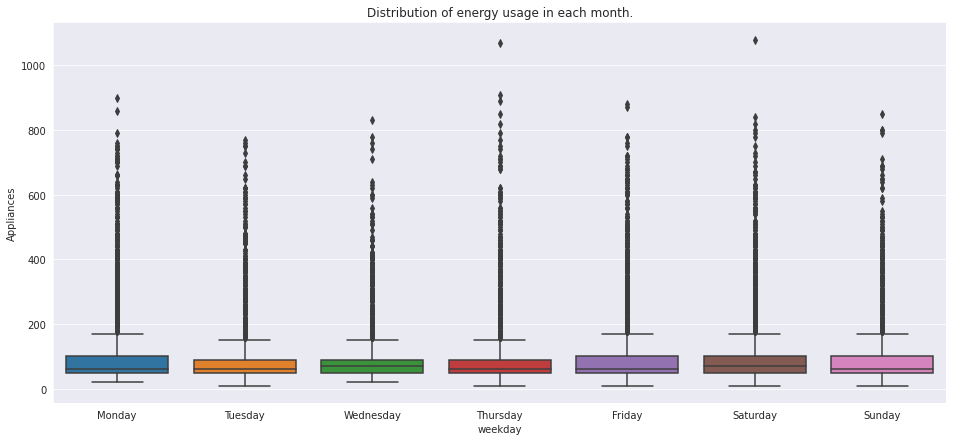

In [31]:
plt.figure(figsize=(16,7))

sns.boxplot(y='Appliances',data=data,x='weekday')
plt.title('Distribution of energy usage in each month.')
plt.show()

3.5. **Distribution of Windspeed each week and month**

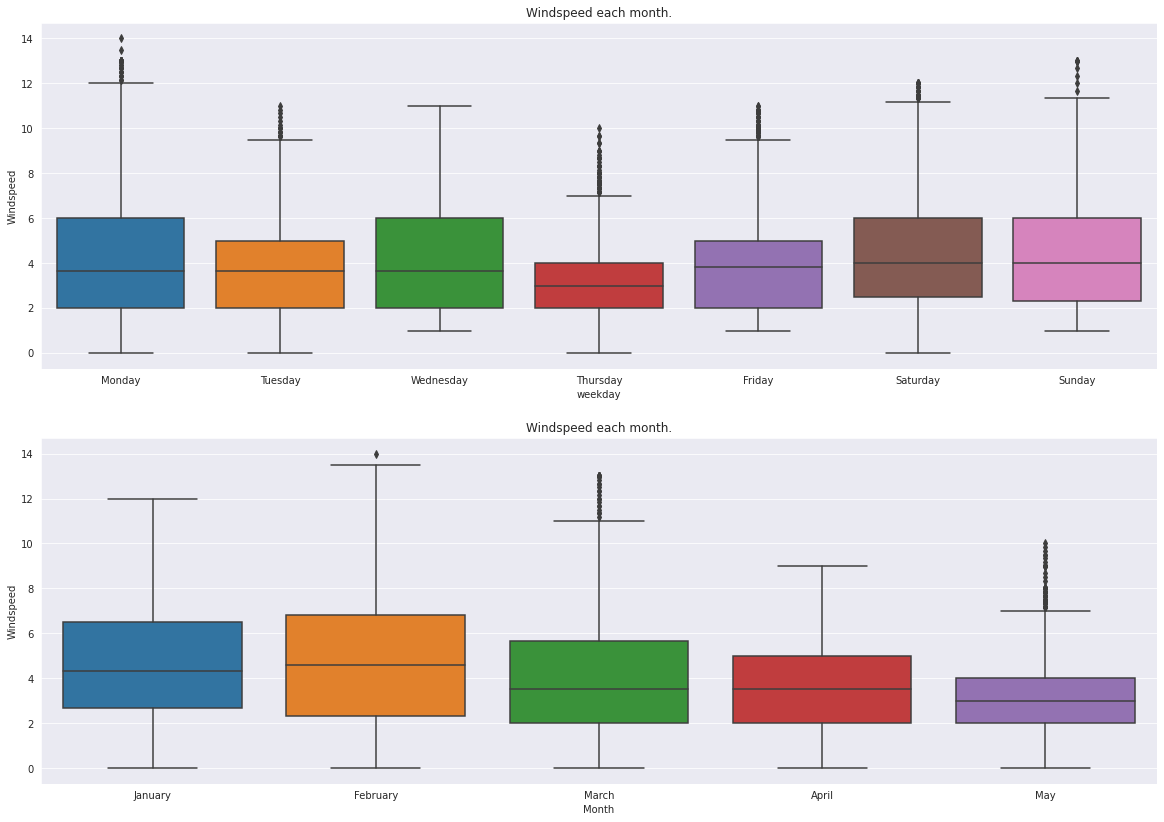

In [32]:
fig,ax=plt.subplots(2,1,figsize=(20,14))

sns.boxplot(y='Windspeed',data=data,x='weekday',ax=ax[0])
ax[0].set_xlabel('weekday')
ax[0].set_title('Windspeed each month.')

#--------------------------------------------------------------------------------------------------

sns.boxplot(y='Windspeed',data=data,x='month',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_title('Windspeed each month.')

plt.show()

3.6. **Distribution of Visibility each week and month**

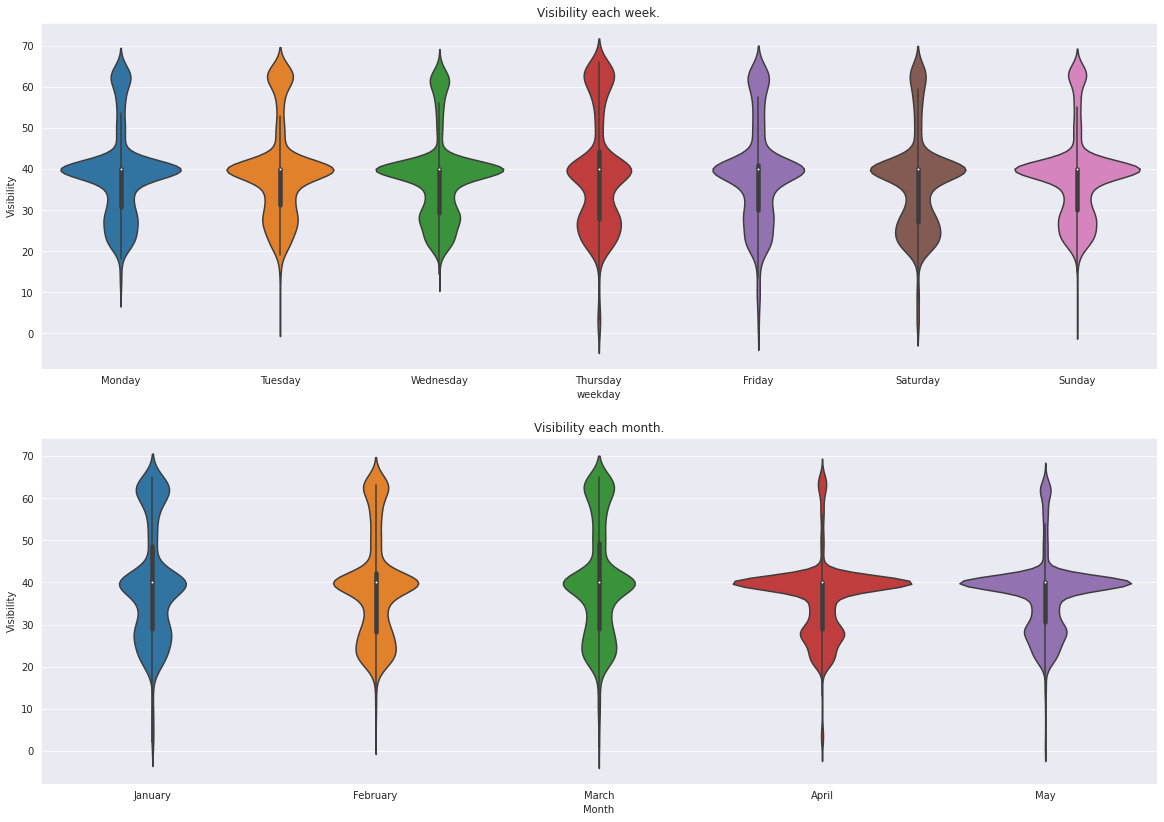

In [33]:
fig,ax=plt.subplots(2,1,figsize=(20,14))

sns.violinplot(y='Visibility',data=data,x='weekday',ax=ax[0])
ax[0].set_xlabel('weekday')
ax[0].set_title('Visibility each week.')

#--------------------------------------------------------------------------------------------------

sns.violinplot(y='Visibility',data=data,x='month',ax=ax[1])
ax[1].set_xlabel('Month')
ax[1].set_title('Visibility each month.')

plt.show()

3.7. **Visibility vs Appliances:-**

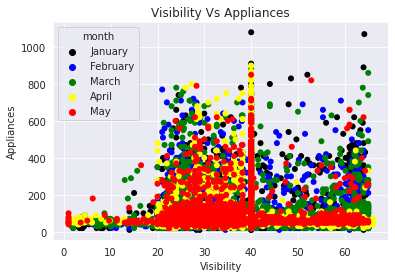

In [34]:

sns.scatterplot(x='Visibility',y='Appliances',data=data,hue='month',palette=['black','Blue','Green','yellow','red'],edgecolor='none')
plt.title('Visibility Vs Appliances')
plt.show()

3.8. **Windspeed vs Appliances**

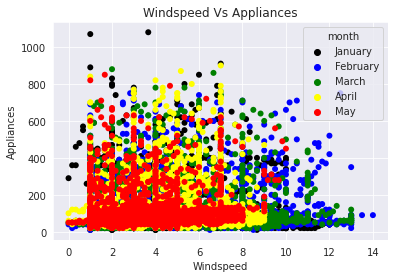

In [35]:
sns.scatterplot(x='Windspeed',y='Appliances',data=data,hue='month',palette=['black','Blue','Green','yellow','red'],edgecolor='none')
plt.title('Windspeed Vs Appliances')
plt.show()

In [42]:
temp_columns=['Temp_kitchen','Temp_living','Temp_laundry','Temp_office','Temp_bathroom','Temp_north','Temp_ironing','Temp_teenage','Temp_parent','Temp_outside']
humid_columns=['Humid_kitchen','Humid_living','Humid_laundry','Humid_office','Humid_bathroom','Humid_north','Humid_ironing','Humid_teenage','Humid_parent','Humid_outside']


3.9. **Jointplot between each temperature columns**

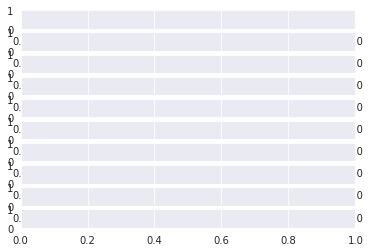

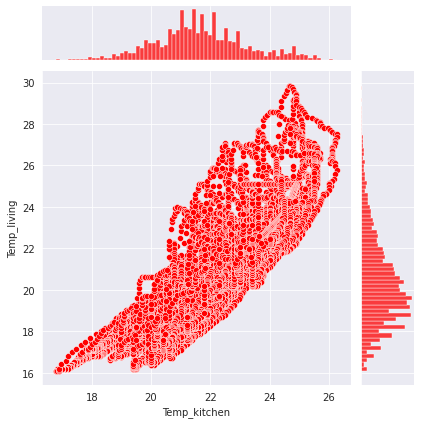

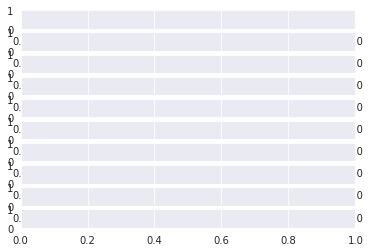

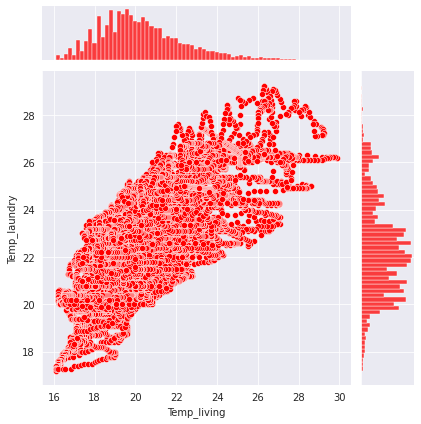

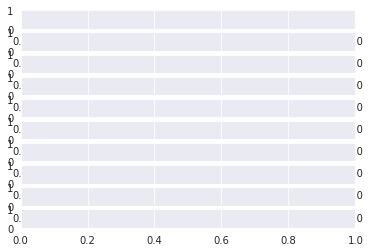

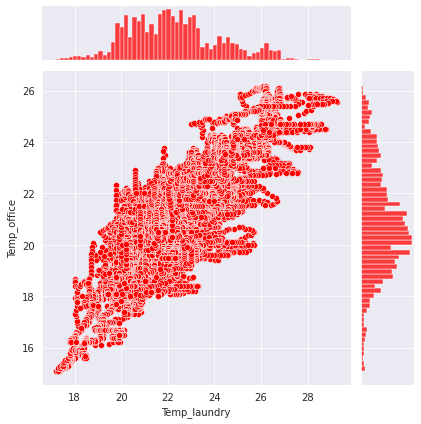

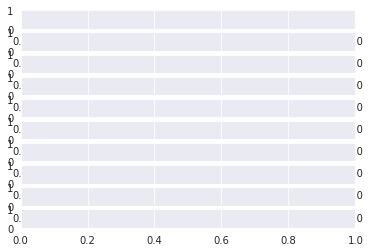

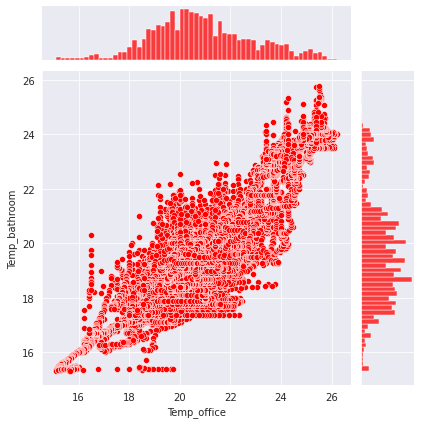

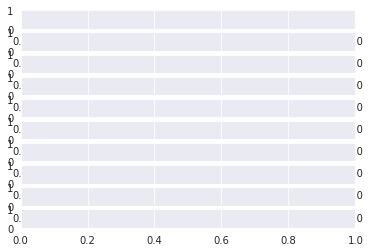

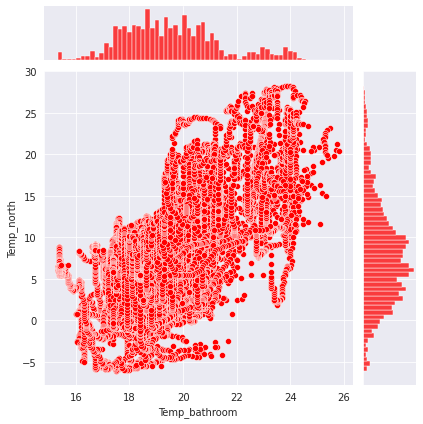

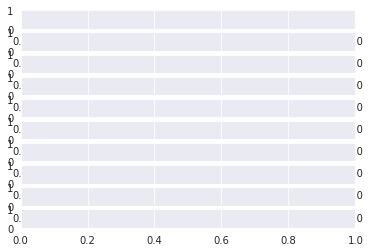

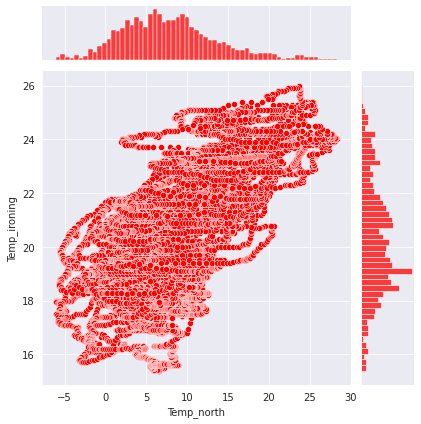

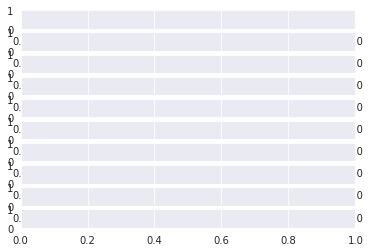

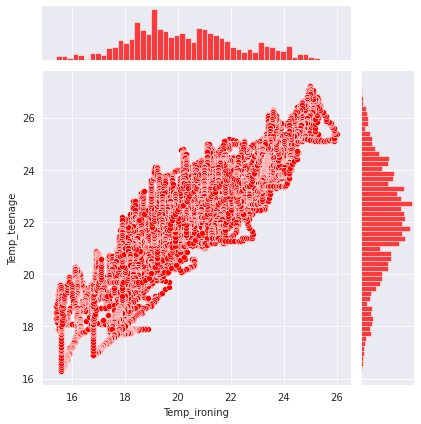

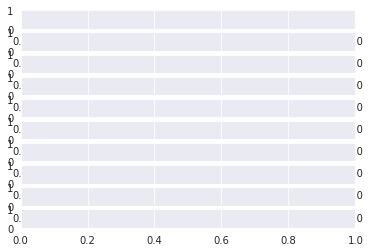

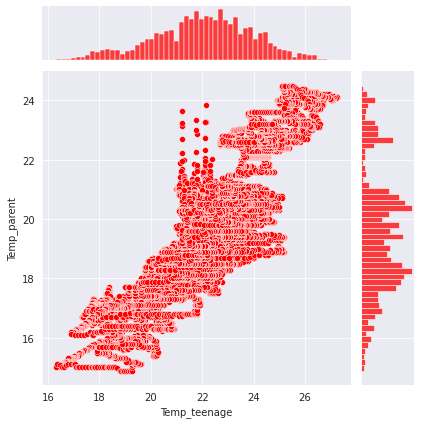

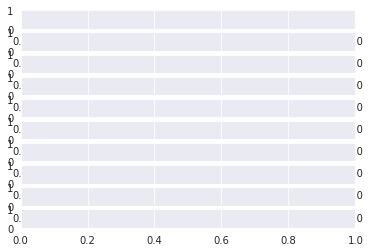

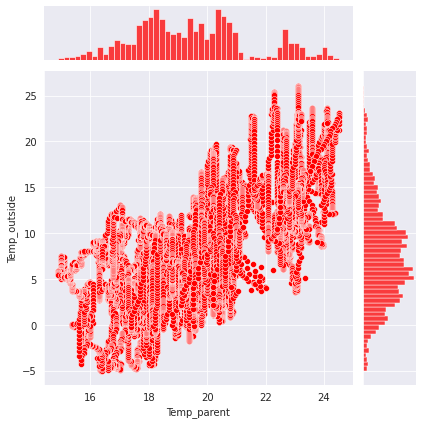

In [46]:

for i in range(0,9):
  fig,ax=plt.subplots(10,1)
  sns.jointplot(x=temp_columns[i],y=temp_columns[i+1],data=data,color='red',ax=ax[i])
  plt.show()

3.10. **Jointplot between each Humidity columns**

KeyboardInterrupt: ignored

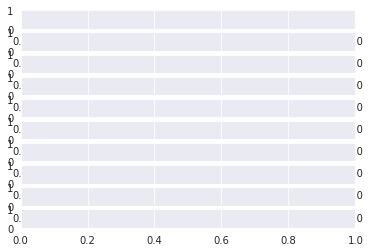

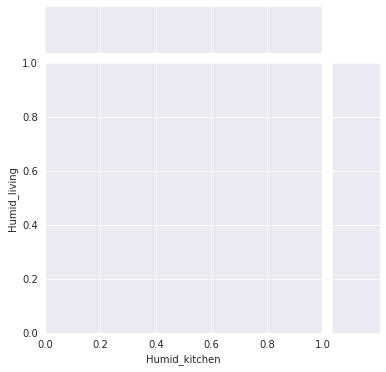

In [38]:


fig,ax=plt.subplots(10,1)

for i in range(0,9):
  sns.jointplot(x=humid_columns[i],y=humid_columns[i+1],color='blue',ax=ax[i],data=data)
  plt.show()

3.11. **Jointplot between each temperature and humidity columns:-**

In [ ]:
for i in range(0,9):
   sns.jointplot(x=temp_columns[i],y=humid_columns[i],data=data,color='green',ax=ax[i])
   plt.show()

3.12. **Correlation between each columns:-**

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')
plt.title('Heatmap of the columns:-')
plt.show()

reg1=data.drop('Appliances',axis=1).select_dtypes(exclude='object').columns

# 4. Data Preparation for Modelling

4.1. **Label Encoding**

In [ ]:
data['month']=data['month'].replace({'March':0,'April':1,'February':2,'May':3,'January':4})
data['weekday']=data['weekday'].replace({'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':7})


4.2. **Creating group based on each continuous values**:-

In [ ]:
reg=data.select_dtypes(exclude='object')

for i in reg.columns:
  data[i+'_group']=pd.cut(reg[i],bins=4,labels=['low','mid','high','extreme'])
  encode=LabelEncoder()
  data[i+'_group']=encode.fit_transform(data[i+'_group'])

4.3. **Splitting the test into train and validation:-**

In [ ]:
x=data.drop(['Appliances'],axis=1)
y=data['Appliances']


xtrain,xvalid,ytrain,yvalid=train_test_split(x,y,test_size=0.3,shuffle=True)

4.4. **Standard scaling the dataset:-**

In [ ]:
scale=StandardScaler()


4.4. **Variance threshold**

In [ ]:
variance=VarianceThreshold(threshold=0.3)


4.5. **Making continuous values normal distibution:-**

In [ ]:
transform=PowerTransformer(method='yeo-johnson')


4.6. **Feature Selection**

In [ ]:
select=SelectKBest(score_func=f_regression,k=42)
ytrain=np.log(ytrain)
yvalid=np.log(yvalid)

4.7. **Pipelineing the entire process:-**

In [ ]:
pipeline=Pipeline(steps=[('VarianceThreshold',variance),('power',transform),('scale',scale),('s',select)])
pipeline.fit(xtrain,ytrain)

xtrain=pipeline.transform(xtrain)
xvalid=pipeline.transform(xvalid)

# 5.Data Modelling

In [ ]:
model=[]
model.append(('Linear Regression',LinearRegression()))
model.append(('SVR',SVR()))
model.append(('Decision Tree Regressor',DecisionTreeRegressor()))
model.append(('Random Forest Regressor',RandomForestRegressor()))
model.append(('Gradient Boosting Regressor',GradientBoostingRegressor()))
model.append(('xgboost',XGBRegressor()))
model.append(('Adaboost',AdaBoostRegressor()))
model.append(('LightBGM',LGBMRegressor()))

from sklearn.metrics import r2_score
scores={}
for name,mod in model:
  score=mod.fit(xtrain,ytrain)
  yhat=mod.predict(xvalid)
  r2_squared=r2_score(yvalid,yhat)
  
  adjusted_r_squared = 1 - (1-r2_squared)*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)

  scores[name]=adjusted_r_squared


In [ ]:
name=list(scores.keys())
scor=list(scores.values())

plt.figure(figsize=(25,10))
sns.barplot(x=name,y=scor)

**Scoring:-**
* **Random Forest Regressor has the best Adjusted R2 score so we go with that algorithm.**

In [ ]:
scores

**Conclusion:-**
* **Linear Regression has the least Adj R2 score,hence it is underfitting.**
* **Random Forest Regressor is the best model to get score of about 70.**


* **Performing Ridge Regression to check best value of alpha.**

**Ridge Regressoion:-**

In [ ]:
alphas = np.linspace(1, 100000, 100)
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(xtrain,ytrain)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("Standardized Coefficients")
plt.title("Ridge coefficients as a function of alpha")


**Lasso Regression:-**

In [ ]:
# Lasso Regression
alphas = np.linspace(2.7800706909230952e-05, 0.01, 100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(xtrain,ytrain)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("alpha")
plt.ylabel("Standardized Coefficients")
plt.title("Lasso coefficients as a function of alpha")

**Random Forest Regressor**

In [ ]:
model=RandomForestRegressor(bootstrap=False,max_depth=None,max_features=21,min_samples_split=2,n_estimators=413)
model.fit(xtrain,ytrain)
yhat=model.predict(xvalid)
r2_squared=r2_score(yvalid,yhat)
adjusted_r_squared = 1 - (1-r2_squared)*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)
print(' Score of random Forest Regressor:-',adjusted_r_squared)

# 6. Hyperparameter Tuning 

 **Random Forest Regressor**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, xtrain.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True, False],
              "n_estimators": sp_randint(100, 500)}



random_search = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist,
                                   n_iter=10, cv=5,  random_state=42)
random_search.fit(xtrain, ytrain)
print(random_search.best_params_)

In [ ]:
model=RandomForestRegressor(bootstrap=False,max_depth=None,max_features=21,min_samples_split=2,n_estimators=413)
model.fit(xtrain,ytrain)
yhat=model.predict(xvalid)
r2_squared=r2_score(yvalid,yhat)
adjusted_r_squared = 1 - (1-r2_squared)*(len(ytrain)-1)/(len(ytrain)-xtrain.shape[1]-1)
print('Best score of random Forest Regressor:-',adjusted_r_squared)

**Hyperparameter Tuning of Gradient Boosting Regressor**

In [ ]:
gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(gbr,parameters,cv=5)
cv.fit(xtrain,ytrain)
cv.best_params_

**Hyperparameter tuning of SVR**

In [ ]:

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(xtrain, ytrain)